In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import os
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
from tensorflow.random import set_seed as SEED
from tensorflow.keras import Sequential as SQ
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense
from tensorflow.keras.losses import BinaryCrossentropy as BCE
from tensorflow.keras.optimizers import Adam

In [ ]:
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 213MB/s]


In [ ]:
import zipfile

zipref = zipfile.ZipFile('/content/brain-mri-images-for-brain-tumor-detection.zip', 'r')
zipref.extractall()
zipref.close()

In [ ]:
dir = '/content/brain_tumor_dataset'
files = []
valid_images = []
def checking_the_images(dir = dir):
  dirname = [os.path.join(dir, f) for f in os.listdir(dir)]
  for path in dirname:
    filejoin = [os.path.join(path, f) for f in os.listdir(path)]
    files.extend(filejoin)
  for filedir in files:
    try:
      img = cv2.imread(filedir)
      valid_images.append(filedir)
    except:
      print('Skipping image')

In [ ]:
checking_the_images()

In [ ]:
len(valid_images)

253

In [ ]:
from PIL import Image

conv_images = []
labels = []
def converting_images(img_folder = valid_images):
  for i in img_folder:
    img = Image.open(i).convert('L')
    img_array = np.array(img, 'uint8')
    resized_img = cv2.resize(img_array, (128, 128))
    conv_images.append(resized_img)
    label = str(i).split('/')[3]
    label_mark = 0 if label == 'no' else 1
    labels.append(label_mark)

In [ ]:
converting_images()

In [ ]:
len(conv_images)

253

In [ ]:
len(labels)

253

array([[ 1,  1,  1, ...,  7, 10, 12],
       [ 1,  1,  1, ..., 11,  7, 12],
       [ 1,  1,  1, ..., 12, 12,  8],
       ...,
       [ 1,  1,  1, ...,  9,  8,  5],
       [ 1,  1,  1, ...,  9,  7,  8],
       [ 1,  1,  1, ...,  6,  6,  7]], dtype=uint8)
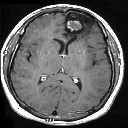

In [ ]:
conv_images[0]

In [ ]:
labels[0]

1

In [ ]:
X = np.asarray(conv_images)
y = np.asarray(labels)

In [ ]:
X.shape, y.shape

((253, 128, 128), (253,))

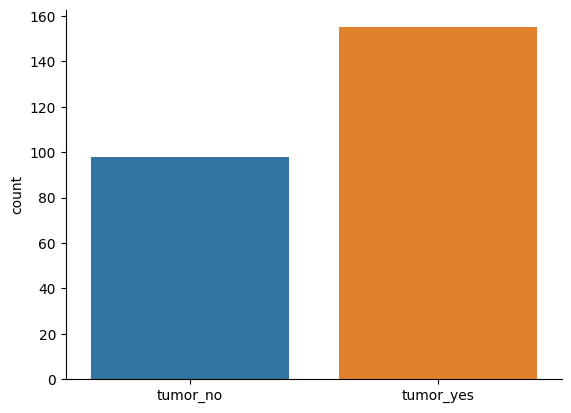

In [ ]:
custom_lbl = ['tumor_no', 'tumor_yes']
sns.countplot(x = y, hue = y, legend = False)
plt.xticks(ticks = [0, 1], labels = custom_lbl)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
np.unique(y, return_counts = True)

(array([0, 1]), array([ 98, 155]))

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 28)

In [ ]:
len(train_X), len(train_y)

(189, 189)

In [ ]:
len(test_X), len(test_y)

(64, 64)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1/255.)

train_X = train_X.reshape(-1, 128, 128, 1)
test_X = test_X.reshape(-1, 128, 128, 1)

train_data = datagen.flow(train_X, train_y, batch_size = 32, shuffle = True)
test_data = datagen.flow(test_X, test_y, batch_size = 32, shuffle = True)

In [ ]:
SEED(28)

model = SQ()
model.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 strides = 1,
                 padding = 'valid',
                 input_shape = (128, 128, 1),
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = 1))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = BCE(),
              optimizer = Adam(),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data, epochs = 10, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/10
6/6 [==============================] - 11s 2s/step - loss: 6.0512 - accuracy: 0.5450 - val_loss: 0.9478 - val_accuracy: 0.7188
Epoch 2/10
6/6 [==============================] - 10s 2s/step - loss: 2.7488 - accuracy: 0.6349 - val_loss: 1.3111 - val_accuracy: 0.6875
Epoch 3/10
6/6 [==============================] - 8s 1s/step - loss: 0.8980 - accuracy: 0.7460 - val_loss: 1.0717 - val_accuracy: 0.5312
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 0.4263 - accuracy: 0.8254 - val_loss: 0.5000 - val_accuracy: 0.8125
Epoch 5/10
6/6 [==============================] - 9s 2s/step - loss: 0.2685 - accuracy: 0.8942 - val_loss: 0.4470 - val_accuracy: 0.8906
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 0.1868 - accuracy: 0.9735 - val_loss: 0.4734 - val_accuracy: 0.8438
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.1088 - accuracy: 0.9894 - val_loss: 0.3905 - val_accuracy: 0.8594
Epoch 8/10
6/6 [=======================

<Axes: >

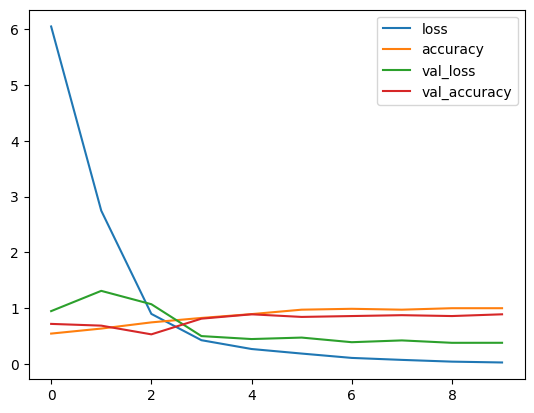

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(test_data)

2/2 [==============================] - 1s 499ms/step - loss: 0.3800 - accuracy: 0.8906


[0.38003289699554443, 0.890625]

In [ ]:
def visualizing_predictions(model = model, n = 1):
  if n == 1:
    random_num = random.randint(0, len(valid_images)-1)
    img = cv2.imread(valid_images[random_num])
    img_array = np.array(img)/255.
    resized_img = cv2.resize(img_array, (128, 128))
    img_res_array = resized_img.reshape(-1, 128, 128, 1)
    prediction = model.predict(img_res_array)
    pred_label = 'no' if prediction[1] < 0.5 else 'yes'
    exp_label = str(valid_images[random_num]).split('/')[3]
    img_disp = cv2.resize(img, (324, 324))
    cv2.putText(img_disp, 'Pred:' + str(pred_label), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0) if pred_label == exp_label else (0, 0, 255), 1)
    cv2.putText(img_disp, 'Exp:' + str(exp_label), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0), 1)
    cv2_imshow(img_disp)

  else:
    random_num = random.sample(range(0, len(valid_images)-1), n)
    for i in random_num:
      img = cv2.imread(valid_images[i])
      img_array = np.array(img)/255.
      resized_img = cv2.resize(img_array, (128, 128))
      img_res_array = resized_img.reshape(-1, 128, 128, 1)
      prediction = model.predict(img_res_array)
      pred_label = 'no' if prediction[1] < 0.5 else 'yes'
      exp_label = str(valid_images[i]).split('/')[3]
      img_disp = cv2.resize(img, (324, 324))
      cv2.putText(img_disp, 'Pred:' + str(pred_label), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0) if pred_label == exp_label else (0, 0, 255), 1)
      cv2.putText(img_disp, 'Exp:' + str(exp_label), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0), 1)
      cv2_imshow(img_disp)

1/1 [==============================] - 0s 58ms/step


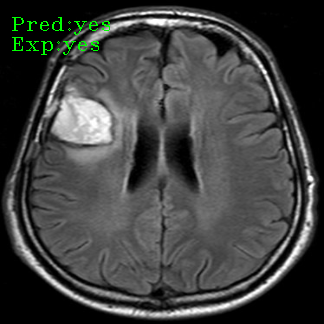

1/1 [==============================] - 0s 70ms/step


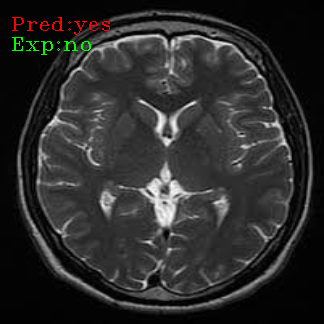

1/1 [==============================] - 0s 73ms/step


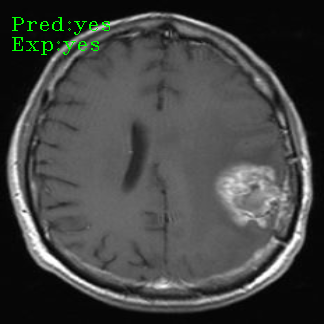

1/1 [==============================] - 0s 142ms/step


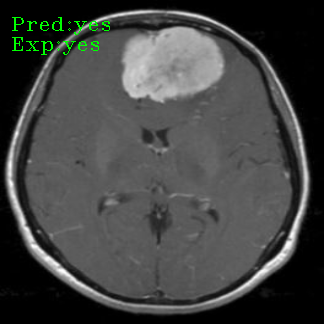

1/1 [==============================] - 0s 180ms/step


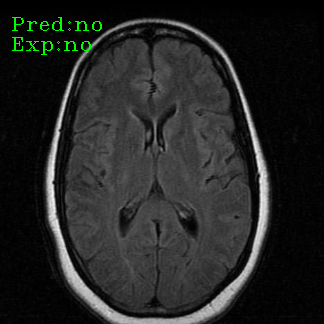

In [ ]:
visualizing_predictions(model, 5)

In [ ]:
predictions = model.predict(test_X).astype(int)

2/2 [==============================] - 1s 546ms/step


In [ ]:
predictions = np.array(predictions)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(test_y, predictions)
round(accuracy, 2)

0.86

<Axes: >

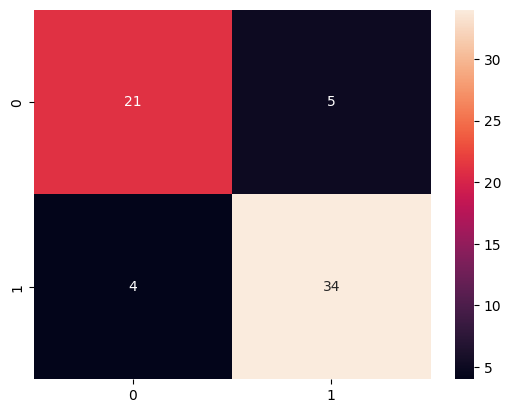

In [ ]:
cm = confusion_matrix(test_y, predictions)
sns.heatmap(cm, annot = True, fmt = '.0f')